# Homework5: Denoising score matching

## Task 1: Theory (4pt)


### Problem 1: Gaussian Diffusion (2pt)

In the course we have discussed two types of gaussian diffusions:
- $\mathbf{x}_t = \mathbf{x}_0 + \sigma_t \cdot \boldsymbol{\epsilon}$ - score-based models,
- $\mathbf{x}_t = \sqrt{1 - \beta_t} \cdot \mathbf{x}_{t-1} + \sqrt{\beta_t} \cdot \boldsymbol{\epsilon}$ - diffusion models.

One may ask, why we do not consider the more general diffusion models. It was the idea of the paper [Variational Diffusion Models](https://arxiv.org/abs/2107.00630).

Let consider the diffusion of the form
$$
    \mathbf{x}_t = \alpha_t \cdot \mathbf{x}_0 + \sigma_t \cdot \boldsymbol{\epsilon}, \quad \mathbf{x}_t \sim q(\mathbf{x}_t | \mathbf{x}_0) = \mathcal{N}(\alpha_t \cdot \mathbf{x}_0, \sigma_t^2 \cdot \mathbf{I}).
$$

1) Show that if the variance of $\mathbf{x}_t$ equals to the variance of $\mathbf{x}_0$ then we came to the standard diffusion (in this case $\alpha_t^2 = 1 - \sigma_t^2$). That is why the standard diffusion is called **Variance Preserving**.

2) Find the distribution $q(\mathbf{x}_t | \mathbf{x}_s)$ for $s < t$ (you have to derive the formulas for mean and variance).

### Solution:

1)$\quad \epsilon$ и $\mathbf{x}_0$ независимы, тогда $$ \mathbb{D} [\mathbf{x}_t] = \mathbb{D} [\alpha_t \cdot \mathbf{x}_0 + \sigma_t \cdot \epsilon] = \alpha_t^2 \mathbb{D} [\mathbf{x}_0] + \sigma_t^2 \mathbb{D} [\epsilon] = \alpha_t^2 \mathbb{D} [\mathbf{x}_0] + \sigma_t^2 \\ $$
$\quad $ Если $ \mathbf{x}_0$ нормировано, то есть $ \mathbb{D} [\mathbf{x}_0] = 1 = \mathbb{D} [\mathbf{x}_k] $, то $ 1 = \alpha_t^2 + \sigma_t^2 \Rightarrow \alpha_t^2 = 1 - \sigma_t^2$


2) $$
    \mathbf{x}_t = \alpha_t \cdot \mathbf{x}_0 + \sigma_t \cdot \boldsymbol{\epsilon}, \quad \mathbf{x}_t \sim q(\mathbf{x}_t | \mathbf{x}_0) = \mathcal{N}(\alpha_t \cdot \mathbf{x}_0, \sigma_t^2 \cdot \mathbf{I}). \\
    \mathbf{x}_s = \alpha_s \cdot \mathbf{x}_0 + \sigma_s \cdot \boldsymbol{\epsilon}, \Rightarrow \mathbf{x}_0 = \frac{\mathbf{x}_s - \sigma_s \cdot \epsilon }{\alpha_s}. \Rightarrow \mathbf{x}_t = \alpha_t * \frac{\mathbf{x}_s - \sigma_s \cdot \epsilon }{\alpha_s} + \sigma_t \cdot \epsilon = \frac{\alpha_t}{\alpha_s} \cdot \mathbf{x}_s + \left( \sigma_t - \sigma_s \frac{\alpha_t}{\alpha_s} \right) \cdot \epsilon
$$
Let $ \alpha_{t | s} =  \frac{\alpha_t}{\alpha_s}, \sigma_{t | s} = \left( \sigma_t - \sigma_s \alpha_{t|s} \right) \Rightarrow \mathbf{x}_t = \alpha_{t | s} \cdot \mathbf{x}_s + \sigma_{t | s} \cdot \epsilon $

$$
\mathbf{x}_{t | s} \sim q(\mathbf{x}_t | \mathbf{x}_s) = \mathcal{N}(\alpha_{t |s} \cdot \mathbf{x}_s, \sigma_{t | s}^2 \cdot \mathbf{I}) = \mathcal{N} \left(\frac{\alpha_t}{\alpha_s} \cdot \mathbf{x}_s, \left( \sigma_t - \sigma_s \frac{\alpha_t}{\alpha_s} \right) ^2 \cdot \mathbf{I} \right)
$$

### Problem 2: Implicit score matching (2pt)

We have discussed score matching task at Lecture 9. The objective of score matching is
$$
    \frac{1}{2} \mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_\mathbf{x} \log \pi(\mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$

And we have already known one possible solution for this task. It is denoising score matching.

Here our goal is to derive one more way to solve the initial score matching problem. It is called **implicit score matching**.

Let consider 1-d case ($x \in \mathbb{R}$).
Prove that
$$
\frac{1}{2} \mathbb{E}_{\pi}\bigl\| s_{\boldsymbol{\theta}}(x) - \nabla_x \log \pi(x) \bigr\|^2_2 = \mathbb{E}_{\pi}\left[ \frac{1}{2}s^2_{\boldsymbol{\theta}}(x) + \nabla_{x} s_{\boldsymbol{\theta}}(x) \right] + \text{const}.
$$

- **Q:** Why is the expression at the right hand side better than the left one? **A:** It is better because we do not have the term with the unknown distribution $\pi(x)$.

- **Q:** Why do we not use this expression instead of denoising score matching? **A:** In this expression we have term $\nabla_{x} s_{\boldsymbol{\theta}}(x) = \nabla^2_{x} \log p(x | \boldsymbol{\theta})$. And it is difficult to work with the second derivates.

- **Q:** Why do we consider only 1-d case? **A:** It is very straightforward to generalize this formula to the multidimensional case, but the derivation contains much more formulas.

### Solution:

$$
    \frac{1}{2} \mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_\mathbf{x} \log \pi(\mathbf{x}) \bigr\|^2_2 = \frac{1}{2}
     \mathbb{E}_{\pi} \left[ \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 + \| \nabla_\mathbf{x} \log \pi(\mathbf{x}) \|_2^2 - 2 \mathbf{s}_{\boldsymbol{\theta}}^{T} \nabla_\mathbf{x} \log \pi(\mathbf{x})  \right] = \frac{1}{2} \mathbb{E}_{\pi} \left[ \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 - 2 \mathbf{s}_{\boldsymbol{\theta}}^{T} \nabla_\mathbf{x} \log \pi(\mathbf{x})  \right] + const = \mathbb{E}_{\pi} \left[ \frac{1}{2} \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 \right]  - \int {\pi(x)} \mathbf{s}_{\boldsymbol{\theta}}^{T} \nabla_\mathbf{x} \log \pi(\mathbf{x})  + const = \mathbb{E}_{\pi} \left[ \frac{1}{2} \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 \right]  - \int {\pi(x)} \mathbf{s}_{\boldsymbol{\theta}}^{T} \frac{ (\pi(\mathbf{x}) )^{'}}{\pi(\mathbf{x})}  + const = \mathbb{E}_{\pi} \left[ \frac{1}{2} \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 \right]  - \int \mathbf{s}_{\boldsymbol{\theta}}^{T} \pi^{'}(\mathbf{x})  + const = \mathbb{E}_{\pi} \left[ \frac{1}{2} \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 \right] + \int \left( \mathbf{s}_{\boldsymbol{\theta}}^{T} \right)^{'} \pi(\mathbf{x}) + const = \mathbb{E}_{\pi} \left[ \frac{1}{2} \| \mathbf{s}_{\boldsymbol{\theta}} \|_2^2 \right] + \mathbb{E}_{\pi} \left[ \left( \mathbf{s}_{\boldsymbol{\theta}}^{T} \right)^{'} \right] + const = \mathbb{E}_{\pi}\left[ \frac{1}{2}s^2_{\boldsymbol{\theta}}(x) + \nabla_{x} s_{\boldsymbol{\theta}}(x) \right] + \text{const}.
$$

In [ ]:
!pip install --upgrade --no-cache-dir gdown

# COMMIT_HASH = "2180d8447bc1c62bf662505d73f60d3e0d7ff03c"
# !if [ -d dgm_utils ]; then rm -Rf dgm_utils; fi
!git clone https://github.com/r-isachenko/dgm_utils.git
%cd dgm_utils
!git checkout {COMMIT_HASH}
!pip install ./
%cd ./..
!rm -Rf dgm_utils

Cloning into 'dgm_utils'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 33 (delta 16), reused 16 (delta 5), pack-reused 0
Unpacking objects: 100% (33/33), 13.19 KiB | 1.32 MiB/s, done.
/kaggle/working/dgm_utils
error: pathspec '{COMMIT_HASH}' did not match any file(s) known to git
Processing /kaggle/working/dgm_utils
  Preparing metadata (setup.py) ... done
  Created wheel for dgm_utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=4467 sha256=28136527cdc68e1d524eca78211970f161b7cb803f6c7fa7df5f6f0b973c143f
  Stored in directory: /tmp/pip-ephem-wheel-cache-47r5_ob2/wheels/c4/61/d6/181d5f6878b040a59f952d14416a5e20d80d80e5672719b535
Successfully built dgm_utils
/kaggle/working


In [ ]:
!pip3 install wandb

In [ ]:
from tqdm import tqdm
from typing import List, Tuple
import math
import dgm_utils

from IPython.display import clear_output
import wandb
from typing import Tuple, Dict, Optional, Union

import numpy as np
from sklearn.datasets import make_moons

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision.utils import make_grid

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

## Task 2: Denoising score matching for 2D data (4 pts)

In this task you will implement the denoising score matching model to the 2D moons dataset.

Let's take a look at dataset samples.

In [ ]:
def generate_moons_data(count: int) -> tuple:
    data, labels = make_moons(n_samples=count, noise=0.1)
    data = data.astype("float32")
    split = int(0.8 * count)
    train_data, test_data = data[:split], data[split:]
    train_labels, test_labels = labels[:split], labels[split:]
    return train_data, train_labels, test_data, test_labels

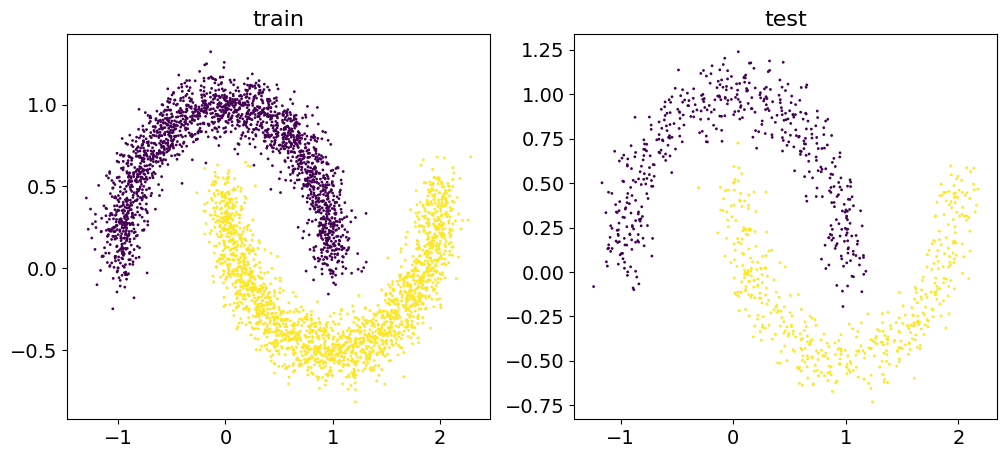

In [ ]:
COUNT = 5000

train_data, train_labels, test_data, test_labels = generate_moons_data(COUNT)
dgm_utils.visualize_2d_data(train_data, test_data, train_labels, test_labels)

Let recall the theory of denoising score matching.

The idea is the following. We define the score function
$$
    \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) = \nabla_{\mathbf{x}}\log p(\mathbf{x}| \boldsymbol{\theta}).
$$

Then we minimize the Fisher divergence to obtain the score function:
$$
    D_F(\pi, p) = \frac{1}{2}\mathbb{E}_{\pi}\bigl\| \mathbf{s}_{\boldsymbol{\theta}}(\mathbf{x}) - \nabla_{\mathbf{x}} \log \pi(\mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}
$$.

If we have the score function, we use the Langevin dynamics to sample from our model:
$$
    \mathbf{x}_{l + 1} = \mathbf{x}_l + \frac{\eta}{2} \cdot \nabla_{\mathbf{x}_l} \log p(\mathbf{x}_l | \boldsymbol{\theta}) + \sqrt{\eta} \cdot \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \mathbf{I}).
$$

But Fisher divergence is intractable and we use the noising procedure to get noised samples $\mathbf{x}_{\sigma} = \mathbf{x} + \sigma \cdot \boldsymbol{\epsilon}$.

Minimizing the Fisher divergence for the noisy samples is equivalent to the following objective:
\begin{multline*}
    \mathbb{E}_{q(\mathbf{x}_{\sigma})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_{\sigma}) \bigr\|^2_2 = \\
    = \mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_{\sigma} | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_{\sigma} | \mathbf{x}) \bigr\|^2_2 + \text{const}(\boldsymbol{\theta}).
\end{multline*}

Here
$$
    \log q(\mathbf{x}_{\sigma} | \mathbf{x}) = - \frac{\mathbf{x}_{\sigma} - \mathbf{x}}{\sigma^2} = - \frac{\boldsymbol{\epsilon}}{\sigma}.
$$

Therefore, the objective of the denoising score matching is

$$
\mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_{\sigma} | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma}(\mathbf{x}_{\sigma}) + \frac{\boldsymbol{\epsilon}}{\sigma} \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}.
$$

In [ ]:
class DenoisingScoreMatcher(nn.Module):
    def __init__(
            self,
            score_model: nn.Module,
            input_shape: Tuple[int],
            sigma: float
        ):
        super().__init__()

        self.score_model = score_model
        self.input_shape = input_shape
        self.sigma = sigma

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x: torch.Tensor):
        # ====
        # your code
        # sample gaussian noise
        # perturb samples using the noise and sigma

        eps = torch.randn_like(x)
        noisy_x = x + self.sigma * eps
        # =====

        # calculate the score model
        s = self.score_model(noisy_x)

        # ====
        # your code
        # compute the loss
        # it is mse between score function and gradient of the normal distribution

        loss = ((s + eps / self.sigma) ** 2)
        # =====

        return loss

    def loss(self, x: torch.Tensor):
        return {"total_loss": self(x).mean(dim=0).sum()}

    def langevin_dynamics(self, x: torch.Tensor, num_steps: int, eta: float):
        # =====
        # your code
        # apply Langevin dynamics in for-cycle to the starting point x

        for i in range(num_steps + 1):
            eps = torch.randn_like(x)
            x = x + eta / 2 * self.score_model(x) + np.sqrt(eta) * eps
        # =====

        return x

    def sample(self, num_samples: int = 64, num_steps: int=100, eta: float = 0.01):
        with torch.no_grad():
            # we sample x_0 from U[-1, 1]
            x0 = 2. * torch.rand_like(torch.empty(num_samples, *self.input_shape)) - 1.
            x0 = x0.to(self.device)

            # run langevine dynamics
            x = self.langevin_dynamics(x0, num_steps=num_steps, eta=eta)
        return x


def test_denoiser_score_matcher():
    matcher = DenoisingScoreMatcher(
        score_model=nn.Linear(2, 2),
        input_shape=(2,),
        sigma=0.1
    )
    x = torch.rand(16, 2)
    assert x.size() == matcher(x).size()
    loss = matcher.loss(x)["total_loss"]
    assert len(loss.size()) == 0
    assert list(matcher.sample(4).size()) == [4, 2]


test_denoiser_score_matcher()

That's all!

And now we are ready to train our model.

Let sample from our model. Experiment with number of steps and $\eta$ for Langevin dynamics.

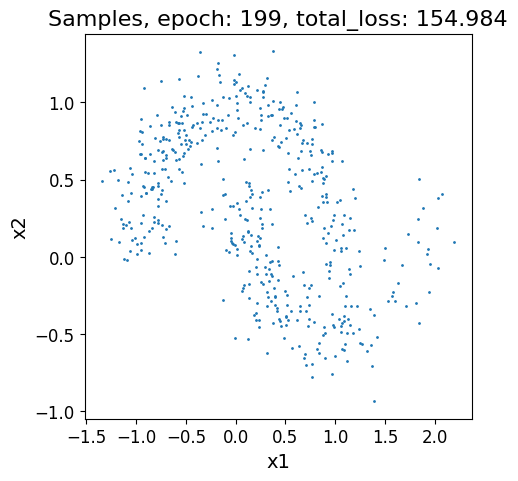

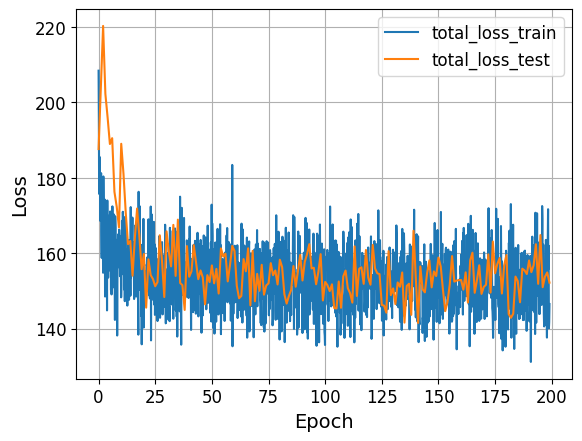

End of the training


In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 512  # any adequate value
EPOCHS = 200 # > 50
LR = 1e-2  # > 1e-3
HIDDEN_SIZE = 128  # > 32
SIGMA = 0.1  # 0.01 < x < 1.0
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

# ====
# your code
# define sequential model
# it is enough to use the sequence of Linear layers with activations

score_model = torchvision.ops.MLP(in_channels=2, hidden_channels=[HIDDEN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE, 2], norm_layer=nn.BatchNorm1d)
# ====

matcher = DenoisingScoreMatcher(
    score_model=score_model, input_shape=(2,), sigma=SIGMA
)

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(matcher.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)
# ====

dgm_utils.train_model(
    matcher,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    scheduler=scheduler,
    device=DEVICE,
    n_samples=512,
)

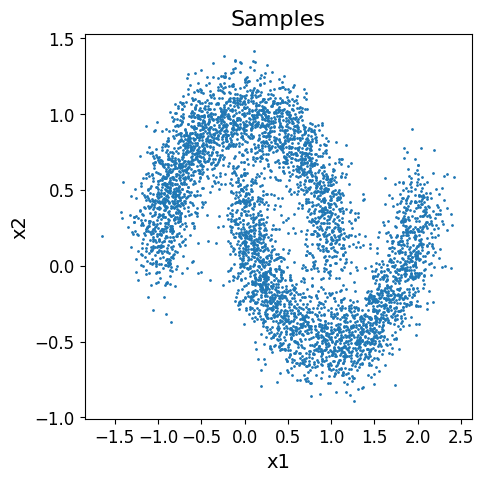

In [ ]:
# ====
# your code
# choose these parameters
NUM_STEPS = 1500
ETA = 0.01
# ====

samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=ETA).cpu()

dgm_utils.visualize_2d_samples(samples, title="Samples")

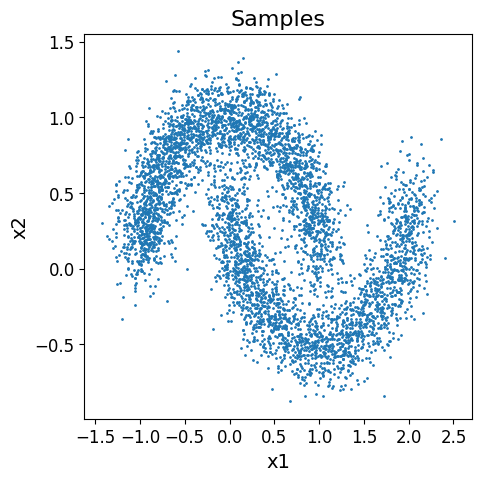

In [ ]:
# ====
# your code
# choose these parameters
NUM_STEPS = 1500
ETA = 0.005
# ====

samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=ETA).cpu()

dgm_utils.visualize_2d_samples(samples, title="Samples")

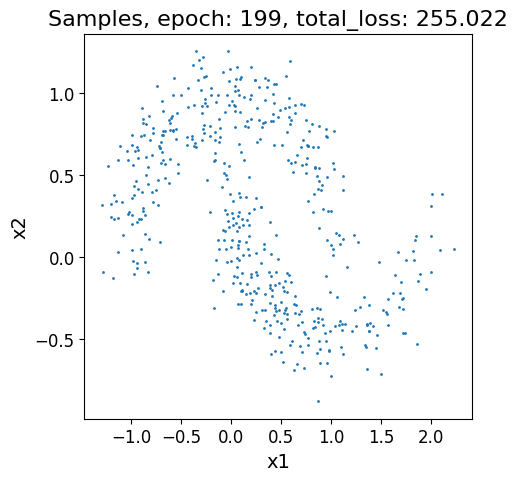

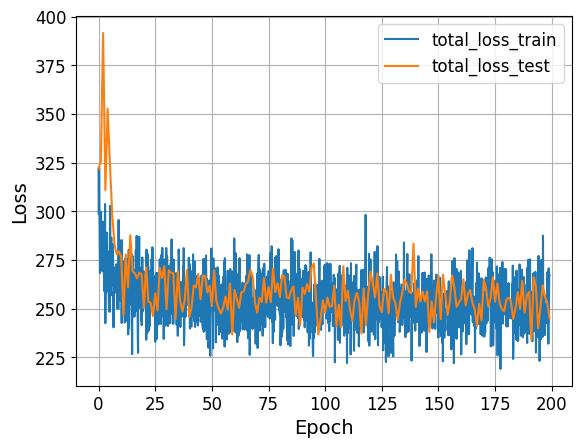

End of the training


In [ ]:
# ====
# your code
# choose these parameters

BATCH_SIZE = 512  # any adequate value
EPOCHS = 200 # > 50
LR = 1e-2  # > 1e-3
HIDDEN_SIZE = 128  # > 32
SIGMA = 0.08  # 0.01 < x < 1.0
# ====

train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

# ====
# your code
# define sequential model
# it is enough to use the sequence of Linear layers with activations

score_model = torchvision.ops.MLP(in_channels=2, hidden_channels=[HIDDEN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE, HIDDEN_SIZE, 2], norm_layer=nn.BatchNorm1d)
# ====

matcher = DenoisingScoreMatcher(
    score_model=score_model, input_shape=(2,), sigma=SIGMA
)

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(matcher.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)
# ====

dgm_utils.train_model(
    matcher,
    train_loader,
    test_loader,
    epochs=EPOCHS,
    optimizer=optimizer,
    scheduler=scheduler,
    device=DEVICE,
    n_samples=512,
)

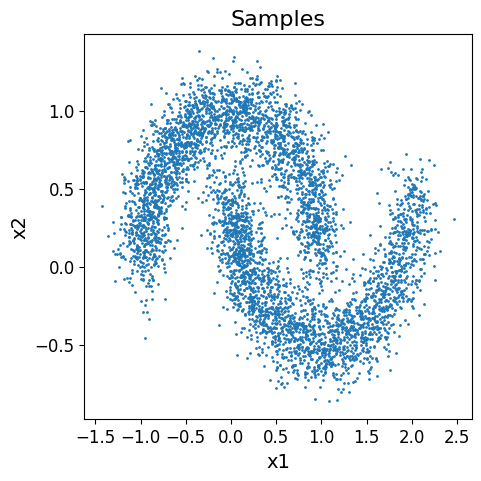

In [ ]:
# ====
# your code
# choose these parameters
NUM_STEPS = 1500
ETA = 0.007
# ====

samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=ETA).cpu()

dgm_utils.visualize_2d_samples(samples, title="Samples")

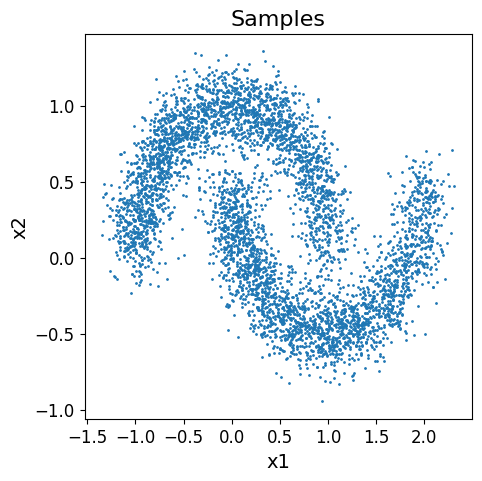

In [ ]:
# ====
# your code
# choose these parameters
NUM_STEPS = 1500
ETA = 0.005
# ====

samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=ETA).cpu()

dgm_utils.visualize_2d_samples(samples, title="Samples")

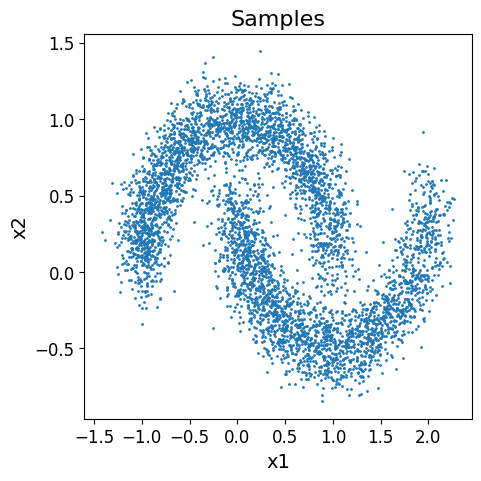

In [ ]:
# ====
# your code
# choose these parameters
NUM_STEPS = 1500
ETA = 0.003
# ====

samples = matcher.sample(num_samples=5000, num_steps=NUM_STEPS, eta=ETA).cpu()

dgm_utils.visualize_2d_samples(samples, title="Samples")

## Task 3: Noise Conditioned Score Network for MNIST (5 pts)

Now we try to extend our model to the NCSN. It means that we have to add multiple noise scales.

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 53833070.80it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1497276.94it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13435907.22it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3161388.78it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



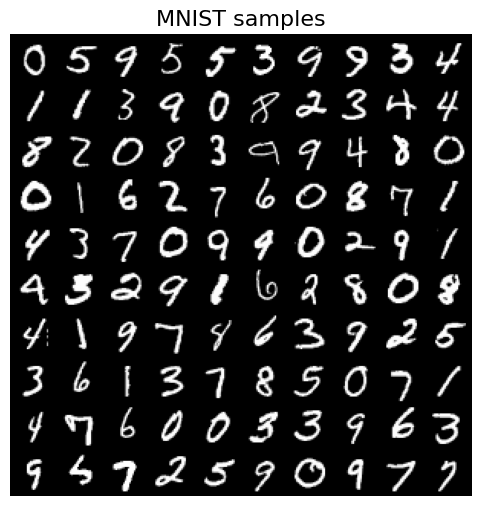

In [ ]:
train_data, test_data = dgm_utils.load_dataset("mnist", flatten=False, binarize=False)
dgm_utils.visualize_images(train_data, "MNIST samples")

Here we will use the resnet-like architecture. But we encourage you to experiment with it.

The important thing here is the conditioning of the score model to noise. It means that the noise scale $\sigma$ have to be the input of the model. We will use embedding layer to make this conditioning.

In [ ]:
class ConditionedResnetBlock(nn.Module):
    def __init__(self, dim: int, num_embeddings: int) -> None:
        super().__init__()
        # you could experiment with this architecture
        self.block = nn.Sequential(
            nn.Conv2d(dim, dim, kernel_size=1),
            nn.BatchNorm2d(dim),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=3, padding=1),
            nn.BatchNorm2d(dim),
            nn.ReLU(),
            nn.Conv2d(dim, dim, kernel_size=1),
        )
        self.dim = dim
        self.embedding = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=dim)

    def forward(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        # look carefully at this conditioning
        time_embed = self.embedding(y).view(-1, self.dim, 1, 1)
        return x + self.block(x + time_embed)


class ConditionedSimpleResnet(nn.Module):
    def __init__(
        self, in_channels: int, out_channels: int, n_filters: int, n_blocks: int, num_embeddings: int
    ) -> None:
        super().__init__()
        self.first_block = nn.Sequential(
            nn.Conv2d(in_channels, n_filters, kernel_size=3, padding=1),
            nn.BatchNorm2d(n_filters),
            nn.ReLU(),
        )
        self.layers = nn.Sequential(*[ConditionedResnetBlock(n_filters, num_embeddings) for _ in range(n_blocks)])
        self.last_block = nn.Sequential(
            nn.ReLU(), nn.Conv2d(n_filters, out_channels, kernel_size=3, padding=1)
        )
        self.n_filters = n_filters

    def forward(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        x = self.first_block(x)
        for layer in self.layers:
            x = layer(x, y)
        x = self.last_block(x)
        return x


def test_conditioned_resnet():
    model = ConditionedSimpleResnet(in_channels=1, out_channels=1, n_filters=16, n_blocks=1, num_embeddings=2)
    x = torch.rand((1, 1, 28, 28))
    y = torch.zeros(size=(1,), dtype=torch.long)
    out1 = model(x, y)
    y = torch.ones(size=(1,), dtype=torch.long)
    out2 = model(x, y)
    assert not np.allclose(out1.detach().numpy(), out2.detach().numpy())


test_conditioned_resnet()

Now lets define the main model.

We will use the sequence of the noise levels: $\sigma_1 < \sigma_2 < \dots < \sigma_T$. In this task it will be the geometric progression.
And we will perturb the original data with the different noise levels to obtain
$$
\mathbf{x}_t = \mathbf{x} + \sigma_t \cdot \boldsymbol{\epsilon}, \quad \mathbf{x}_t \sim q(\mathbf{x}_t).
$$

Our training objective:
$$
    \sum_{t=1}^T \frac{\sigma_t^2}{\sigma_T^2} \mathbb{E}_{\pi(\mathbf{x})} \mathbb{E}_{q(\mathbf{x}_t | \mathbf{x})}\bigl\| \mathbf{s}_{\boldsymbol{\theta}, \sigma_t}(\mathbf{x}_t) - \nabla_{\mathbf{x}_{\sigma}} \log q(\mathbf{x}_t | \mathbf{x}) \bigr\|^2_2 \rightarrow \min_{\boldsymbol{\theta}}
$$
But instead of doing the honest summation we will sample one timestamp for each sample.

We will use annealed Langevin dynamics to sample from our model:
1. Sample $\mathbf{x}_0 \sim \mathcal{N}(0, \sigma_T^2 \cdot \mathbf{I}) \approx q(\mathbf{x}_T)$.
2. Apply $L$ steps of Langevin dynamic
$$
    \mathbf{x}_l = \mathbf{x}_{l-1} + \frac{\eta_t}{2} \cdot \mathbf{s}_{\boldsymbol{\theta}, \sigma_t}(\mathbf{x}_{l - 1}) + \sqrt{\eta_t} \cdot \boldsymbol{\epsilon}_l.
$$
3. Update $\mathbf{x}_0 := \mathbf{x}_L$ and choose the next $\sigma_t$.
4. Repeat it for all sigmas.

**Note:** use the following formula for $\eta_t = \epsilon \cdot \frac{\sigma_t^2}{\sigma_T^2}$ ($\epsilon$ is a small number that is a hyperparameter of the sampling).

In [ ]:
class NoiseConditionedScoreNetwork(nn.Module):
    def __init__(
            self,
            score_model: nn.Module,
            input_shape: Tuple[int],
            sigmas: List[float]
        ):
        super().__init__()

        self.step = 0
        self.score_model = score_model
        self.input_shape = input_shape
        self.sigmas = torch.FloatTensor(sorted(sigmas, reverse=False))

    @property
    def device(self):
        return next(self.parameters()).device

    def forward(self, x: torch.Tensor):
        self.sigmas = self.sigmas.to(self.device)
        batch_size = x.shape[0]
        # ====
        # your code
        # sample gaussian noise
        # sample timestamps for each datapoint in the batch
        # choose sigmas for these datapoints
        # add noises to the x samples

        n_shapes = len(self.input_shape)
        self.T = len(self.sigmas)
        eps = torch.randn_like(x)
        times = torch.randint(0, self.T, (batch_size,), device=self.device)
        which_sigmas = self.sigmas[times]
 #       print('which sigmas old: ', which_sigmas.shape)
        which_sigmas = which_sigmas[(..., ) + (None,) * n_shapes]
 #       print('which sigmas: ', which_sigmas.shape)
        noisy_x = x + which_sigmas * eps
        # =====

        # calculate the score model
        s = self.score_model(noisy_x, times)

        # ====
        # your code
        # compute the loss
        # it is mse between score function and gradient of the normal distribution (do not forget the coefficient before the mse)

        loss = (which_sigmas ** 2 / self.sigmas[self.T - 1] ** 2) * ((s + eps / which_sigmas) ** 2)
        # =====
        return loss

    def loss(self, x: torch.Tensor):
        return {"total_loss": self(x).mean(dim=0).sum()}

    def annealed_langevin_dynamics(self, x: torch.Tensor, num_steps: int, param: float):
        # =====
        # your code
        # here we will have 2 cycles: one for sigmas, one for Langevin sampling
        # start with the largest sigma, apply Langevin dynamic for it and move to the next sigma

        # =====

        for t in range(self.T - 1, 0, -1):
            sigma_cur = self.sigmas[t].to(self.device)
            for i in range(num_steps + 1):
                eps = torch.randn_like(x)
                eta = param * sigma_cur ** 2 / self.sigmas[self.T - 1] ** 2

                x = x + eta / 2 * self.score_model(x, torch.tensor(t, device=x.device)) + torch.sqrt(eta) * eps

        return x

    def sample(self, num_samples: int = 64, num_steps: int=100, eps: float = 0.1):
        with torch.no_grad():
            # we sample x_0 from U[-1, 1]
            x0 = 2. * torch.rand_like(torch.empty(num_samples, *self.input_shape)) - 1.
            x0 = x0.to(self.device)

            # run langevine dynamics
            x = self.annealed_langevin_dynamics(x0, num_steps=num_steps, param=eps)
        return x


    def log_metric(self, metric_name: str, loader_name: str, value: Union[float, torch.Tensor, wandb.Image]):
        wandb.log({f'{metric_name}/{loader_name}': value}, step=self.step)

    @torch.no_grad()
    def snapshot(self, samples, title, figsize=None, nrow=None) -> None:
        if isinstance(samples, np.ndarray):
            samples = torch.FloatTensor(samples)
        if nrow is None:
            nrow = int(np.sqrt(len(samples)))
        grid_samples = make_grid(samples, nrow=nrow)

        grid_img = grid_samples.permute(1, 2, 0)
        if figsize is None:
            figsize = (6, 6)

        grid_img = grid_img.clip(0, 1).mul(255)
        grid_img = grid_img.data.numpy().astype(np.uint8)
        self.log_metric('images', 'from_noise', wandb.Image(grid_img))


def test_ncsn():
    class DummyConditionedMLP(nn.Module):
        def __init__(self):
            super().__init__()
            self.layer = nn.Linear(2, 2)

        def forward(self, x: torch.Tensor, y: torch.Tensor):
            y = y.view(-1, 1)
            return self.layer(x) + y


    ncsn = NoiseConditionedScoreNetwork(
        score_model=DummyConditionedMLP(),
        input_shape=(2,),
        sigmas=[0.1]
    )
    x = torch.rand(16, 2)
    assert x.size() == ncsn(x).size()
    loss = ncsn.loss(x)["total_loss"]
    assert len(loss.size()) == 0
    assert list(ncsn.sample(4).size()) == [4, 2]


test_ncsn()

In [ ]:
L = 10
# ====
# your code
# choose these parameters
SIGMA_MIN = 0.01
SIGMA_MAX = 1
# ====
q = (SIGMA_MAX / SIGMA_MIN) ** (1 / (L - 1))
SIGMAS = [SIGMA_MIN * q**i for i in range(0, L)]
print(SIGMAS)

[0.01, 0.01668100537200059, 0.02782559402207125, 0.046415888336127795, 0.07742636826811271, 0.12915496650148842, 0.2154434690031884, 0.3593813663804628, 0.5994842503189411, 1.0000000000000002]


In [ ]:
from collections import defaultdict
from IPython.display import clear_output
from typing import Optional, Tuple

import numpy as np

import torch

from dgm_utils import show_samples, visualize_2d_samples, plot_training_curves #, train_epoch, eval_model, check_samples_is_2d


def train_epoch(
    model: object,
    train_loader: object,
    optimizer: torch.optim.Optimizer,
    device: str = "cpu",
    loss_key: str = "total",
) -> defaultdict:
    model.train()

    stats = defaultdict(list)
    for x in train_loader:
        model.step += 1
        x = x.to(device)
        losses = model.loss(x)
        optimizer.zero_grad()
        losses[loss_key].backward()
        optimizer.step()

        for k, v in losses.items():
            stats[k].append(v.item())
            wandb.log({k:v}, step=model.step)

    return stats


def eval_model(model: object, data_loader: object, device: str = "cpu") -> defaultdict:
    model.eval()
    stats = defaultdict(float)
    with torch.no_grad():
        for x in data_loader:
            x = x.to(device)
            losses = model.loss(x)
            for k, v in losses.items():
                stats[k] += v.item() * x.shape[0]

        for k in stats.keys():
            stats[k] /= len(data_loader.dataset)
    return stats


def check_samples_is_2d(samples: np.ndarray) -> bool:
    shape = samples.shape
    if len(shape) == 2 and shape[1] == 2:
        return True
    return False


def train_model_wandb(
    model: object,
    train_loader: object,
    test_loader: object,
    epochs: int,
    optimizer: torch.optim.Optimizer,
    scheduler: Optional[torch.optim.lr_scheduler._LRScheduler] = None,
    device: str = "cpu",
    loss_key: str = "total_loss",
    n_samples: int = 100,
    visualize_samples: bool = True,
    project_name: str = 'Denoising score matching',
    experiment_name: str = 'MNIST_baseline'
) -> Tuple[dict, dict]:

    session = wandb.init(project=project_name, name=experiment_name)

    train_losses = defaultdict(list)
    test_losses = defaultdict(list)
    model = model.to(device)
    print("Start of the training")
    idx = 0

    for epoch in range(epochs):
      #  model.step = epoch
        model.train()
        train_loss = train_epoch(
            model, train_loader, optimizer, device, loss_key
        )
        if scheduler is not None:
            scheduler.step()
        test_loss = eval_model(model, test_loader, device)

        for k in train_loss.keys():
            train_losses[k].extend(train_loss[k])
          #  idx += 1
         #   model.log_metric('Loss', 'Train', train_loss[k])
            test_losses[k].append(test_loss[k])
            model.log_metric('Loss', 'Test', test_loss[k])

        epoch_loss = np.mean(train_loss[loss_key])
        model.log_metric('Loss', 'Train', epoch_loss)
        if visualize_samples:
            with torch.no_grad():
                samples = model.sample(n_samples)
                samples = samples.cpu().detach().numpy()

            clear_output(wait=True)
            title = f"Samples, epoch: {epoch}, {loss_key}: {epoch_loss:.3f}"
            if check_samples_is_2d(samples):
                visualize_2d_samples(samples, title=title)
            else:
                show_samples(samples, title=title)
            model.snapshot(samples, title=f"Generated samples: epoch: {epoch}")
            plot_training_curves(train_losses, test_losses)
        else:
            print(f"Epoch: {epoch}, loss: {epoch_loss}")
    if not visualize_samples:
        plot_training_curves(train_losses, test_losses)
    print("End of the training")


    session.finish()

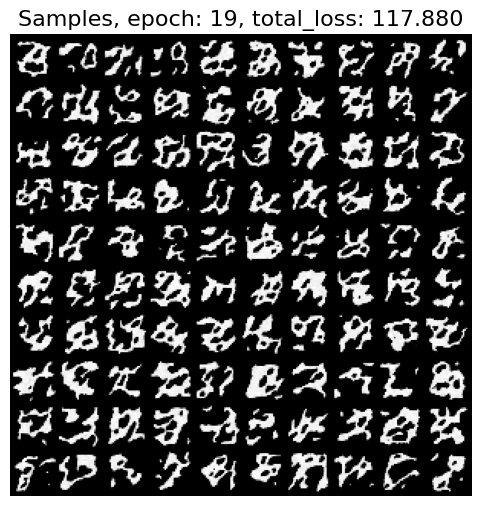

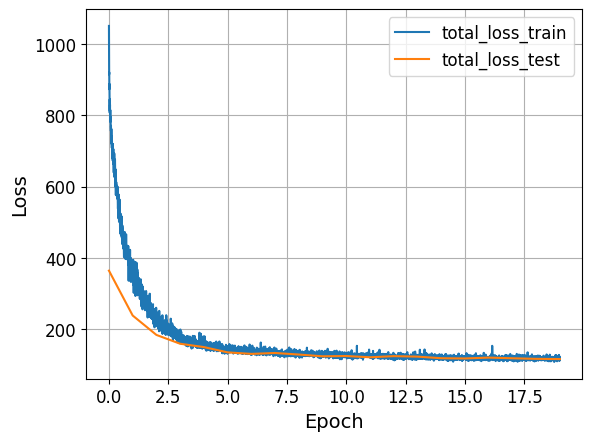

End of the training


Epoch loss/Train,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss/Test,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch loss/Train,117.88042
Loss/Test,116.38062


In [ ]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 256  # any adequate value
LR = 2e-4  # <= 1e-3
EPOCHS = 20  # <= 30
N_FILTERS = 256  # < 128
N_BLOCKS = 5  # < 8
# ====

train_loader = data.DataLoader(2 * train_data - 1, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(2 * test_data - 1, batch_size=BATCH_SIZE, shuffle=True)

score_model = ConditionedSimpleResnet(
     in_channels=1, out_channels=1, n_filters=N_FILTERS, n_blocks=N_BLOCKS, num_embeddings=len(SIGMAS)
)

ncsn = NoiseConditionedScoreNetwork(
    score_model=score_model, input_shape=(1, 28, 28), sigmas=SIGMAS,
)

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(ncsn.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)
# ====

# train
train_model_wandb(
    ncsn,
    train_loader,
    test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    epochs=EPOCHS,
    device=DEVICE,

)

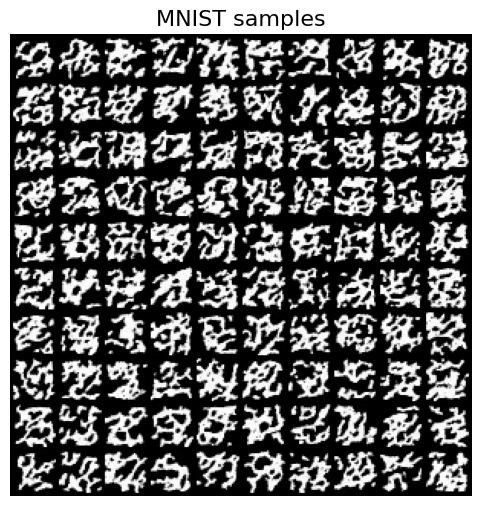

In [ ]:
# ====
# your code
# choose these parameters
NUM_STEPS = 100
EPS = 0.03
# ====

samples = ncsn.sample(100, num_steps=NUM_STEPS, eps=EPS).cpu()
samples = torch.clamp(0.5 * samples + 0.5, 0.0, 1.0)
dgm_utils.show_samples(samples, "MNIST samples")

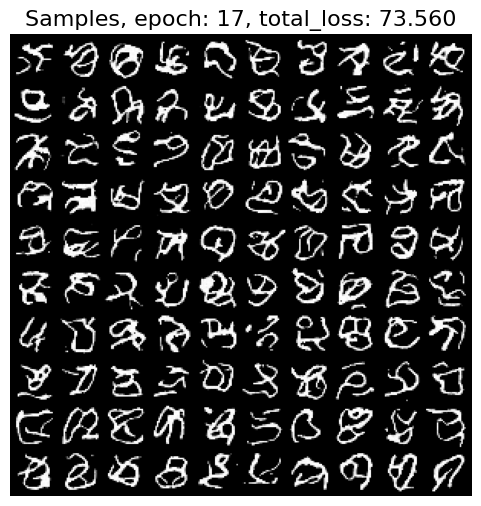

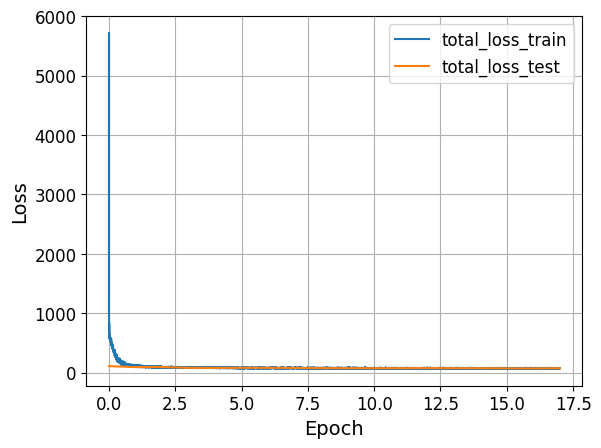

In [ ]:
# ====
# your code
# choose these parameters
BATCH_SIZE = 128  # any adequate value
LR = 5e-4  # <= 1e-3
EPOCHS = 20  # <= 30
N_FILTERS = 256  # < 128
N_BLOCKS = 5  # < 8
# ====

train_loader = data.DataLoader(2 * train_data - 1, batch_size=BATCH_SIZE, shuffle=True)
test_loader = data.DataLoader(2 * test_data - 1, batch_size=BATCH_SIZE, shuffle=True)

score_model = ConditionedSimpleResnet(
     in_channels=1, out_channels=1, n_filters=N_FILTERS, n_blocks=N_BLOCKS, num_embeddings=len(SIGMAS)
)

ncsn = NoiseConditionedScoreNetwork(
    score_model=score_model, input_shape=(1, 28, 28), sigmas=SIGMAS,
)

# ====
# your code
# choose any optimizer/scheduler as you want
optimizer = torch.optim.Adam(ncsn.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)
# ====

# train
train_model_wandb(
    ncsn,
    train_loader,
    test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    epochs=EPOCHS,
    device=DEVICE,

)